# SDE Review: GBM & Vasicek Models

In [2]:
import pandas as pd
import numpy as np
import random
import sde
import matplotlib.pyplot as plt

import ipywidgets as widgets
from IPython.display import display

%load_ext autoreload
%autoreload 2
%matplotlib inline

ModuleNotFoundError: No module named 'sde'

In [4]:
seq = (1,-1)
wts = (.5,.5)
k=100
xi = random.choices(seq, wts, cum_weights=None, k=k)
s0=0


In [3]:
# Generate scenarios from a Generalized Wiener Process
T=10
n_paths=1000
a=.1
b=.1
x = sde.gwp(T=T, n_paths=n_paths, a=a, b=b)

# Compute deterministic function
b=0
n_paths=1
x_deterministic = sde.gwp(T, n_paths, a, b)


Text(0.5, 0, 'Frequency')

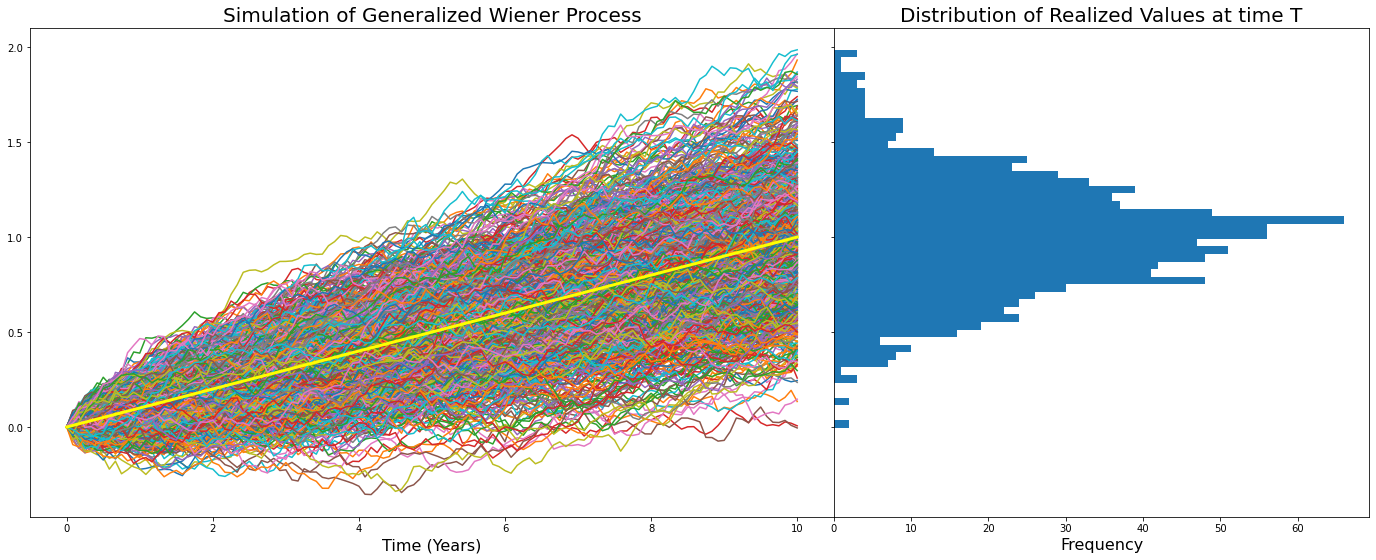

In [4]:
# Plot generalized Wiener process for a specified number of paths
fig, (x_ax, hist_ax) = plt.subplots(nrows=1, ncols=2, sharey=True, gridspec_kw={'width_ratios':[3,2]}, figsize=(24, 9))
plt.subplots_adjust(wspace=0.0)
    
x.plot(ax=x_ax, legend=False)
# y_max=x.values.max()
# x_ax.set_ylim(top=y_max)
x_deterministic.plot(ax=x_ax, label='x = at', color='yellow', linewidth=3, legend=False)
x_ax.set_xlabel('Time (Years)', fontsize=16)
x_ax.set_title('Simulation of Generalized Wiener Process', fontsize=20)
hist_ax.set_title('Distribution of Realized Values at time T', fontsize=20)
    
x.iloc[-1,:].plot.hist(ax=hist_ax, bins=50, orientation='horizontal')
hist_ax.set_xlabel('Frequency', fontsize=16)


<AxesSubplot:>

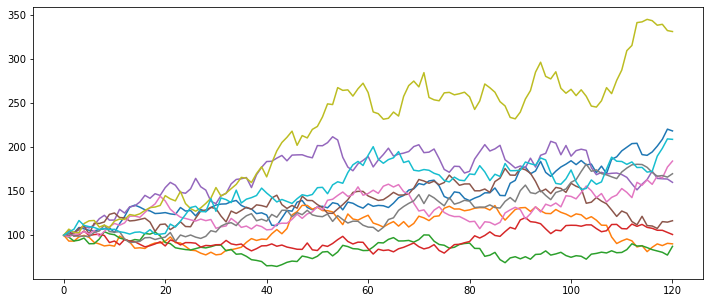

In [5]:
# Brownian Motion
n_years=10
n_scenarios=1
mu=.07
sigma=.15
steps_per_year=12

prices = sde.gbm(n_years = 10, n_scenarios=10, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0, prices=True)
prices.plot(figsize=(12,5),legend=False)


In [6]:
gbm_controls = widgets.interactive(sde.show_gbm, 
                                   n_scenarios=widgets.IntSlider(min=1, max=500, step=1, value=250), 
                                   mu=(0., +.2,.01),
                                   sigma=(0, .3, .01)
)
display(gbm_controls)

interactive(children=(IntSlider(value=250, description='n_scenarios', max=500, min=1), FloatSlider(value=0.1, …

In [7]:
# Simulate rates and bond prices using Vasicek model
n_years = 30
n_scenarios=1000
k=0.1
theta=0.03
sigma=0.001
steps_per_year=12
r0=.05

rates, prices = sde.vasicek(n_years, n_scenarios, k, theta, sigma, steps_per_year, r0)

Text(0.5, 0, 'Frequency')

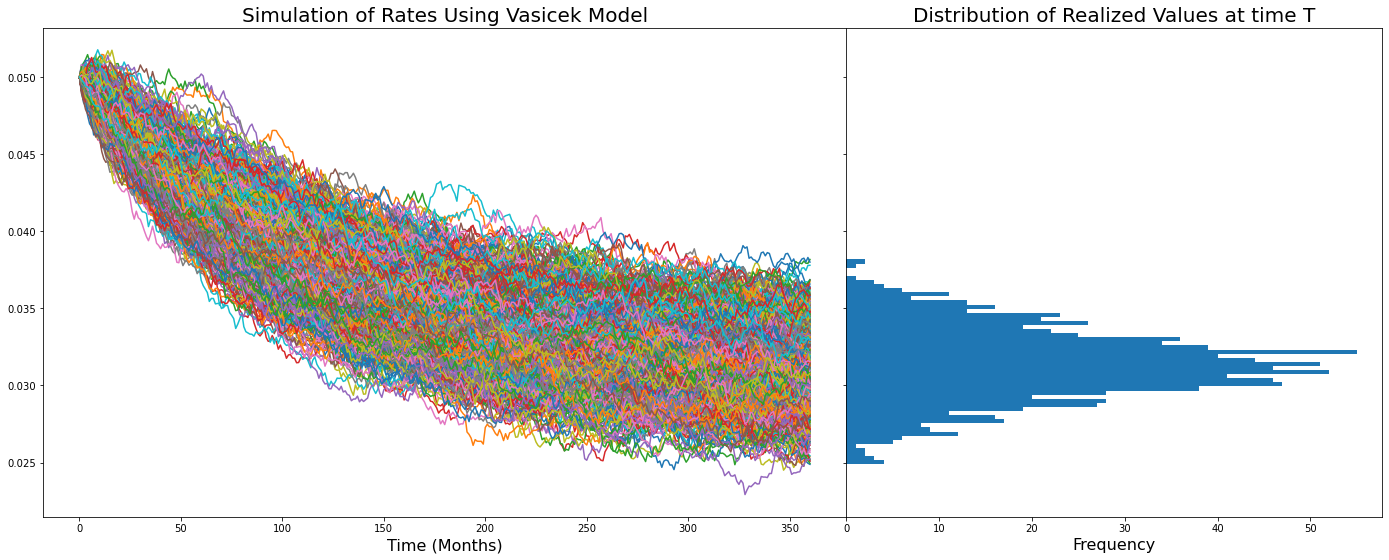

In [8]:
# Plot rates
fig, (x_ax, hist_ax) = plt.subplots(nrows=1, ncols=2, sharey=True, gridspec_kw={'width_ratios':[3,2]}, figsize=(24, 9))
plt.subplots_adjust(wspace=0.0)
    
rates.plot(ax=x_ax, legend=False)
# y_max=x.values.max()
# wealth_ax.set_ylim(top=y_max)

x_ax.set_xlabel('Time (Months)', fontsize=16)
x_ax.set_title('Simulation of Rates Using Vasicek Model', fontsize=20)
hist_ax.set_title('Distribution of Realized Values at time T', fontsize=20)
    
rates.iloc[-1,:].plot.hist(ax=hist_ax, bins=50, orientation='horizontal')
hist_ax.set_xlabel('Frequency', fontsize=16)

Text(0.5, 0, 'Frequency')

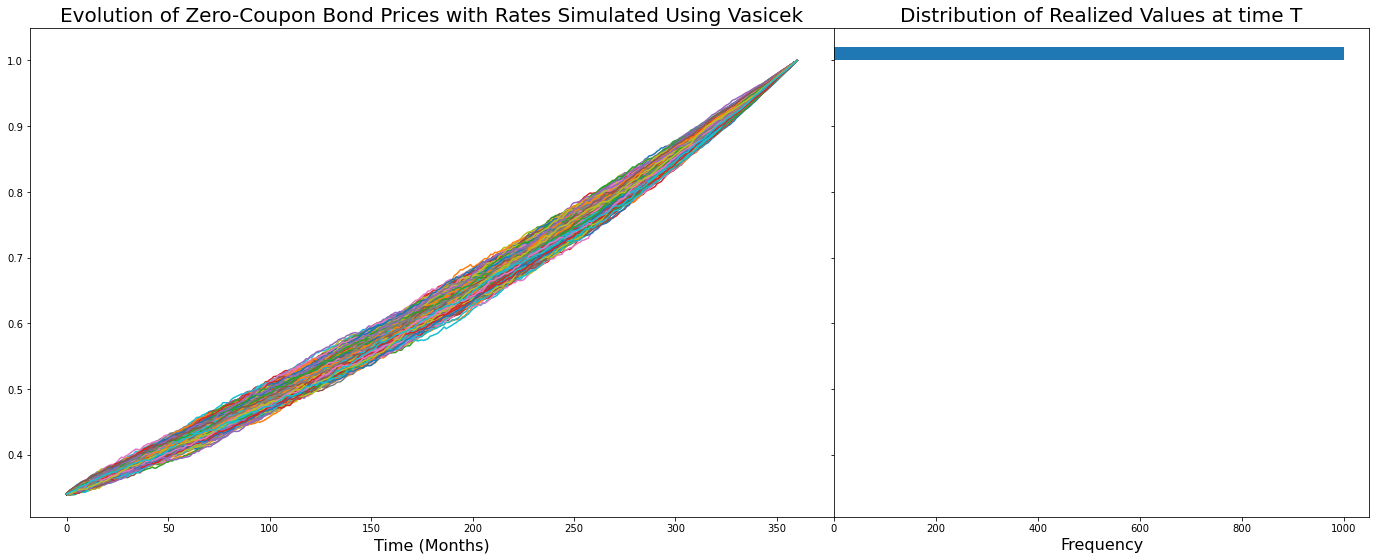

In [9]:
# Plot bond prices
fig, (x_ax, hist_ax) = plt.subplots(nrows=1, ncols=2, sharey=True, gridspec_kw={'width_ratios':[3,2]}, figsize=(24, 9))
plt.subplots_adjust(wspace=0.0)
    
prices.plot(ax=x_ax, legend=False)
y_max=prices.values.max()
x_ax.set_ylim(top=y_max*1.05)

x_ax.set_xlabel('Time (Months)', fontsize=16)
x_ax.set_title('Evolution of Zero-Coupon Bond Prices with Rates Simulated Using Vasicek', fontsize=20)
hist_ax.set_title('Distribution of Realized Values at time T', fontsize=20)
    
prices.iloc[-1,:].plot.hist(ax=hist_ax, bins=50, orientation='horizontal')
hist_ax.set_xlabel('Frequency', fontsize=16)